In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import mplcyberpunk as pnk

In [156]:
sol_musicos = pd.read_csv(r'E:\OneDrive\Data Science Bootcamp 2023\jaume_eda\03 - solicitudes_musicos\solicitudes_musicos.csv',encoding='latin-1')
sol_musicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   547 non-null    int64  
 1   Date                                 547 non-null    object 
 2   Title                                506 non-null    object 
 3   calculadora_musico_nombre_artistico  547 non-null    object 
 4   calculadora_musico_provincia         512 non-null    object 
 5   calculadora_musico_tipo              533 non-null    object 
 6   calculadora_provincia_evento         512 non-null    object 
 7   calculadora_numero_invitados         512 non-null    float64
 8   calculadora_espacio_evento           512 non-null    object 
 9   calculadora_horas_actuacion          512 non-null    float64
 10  calculadora_formato_musico           452 non-null    object 
 11  estimacionPrecioTotal           

In [157]:
sol_musicos

,id,Date,Title,calculadora_musico_nombre_artistico,calculadora_musico_provincia,calculadora_musico_tipo,calculadora_provincia_evento,calculadora_numero_invitados,calculadora_espacio_evento,calculadora_horas_actuacion,calculadora_formato_musico,estimacionPrecioTotal,fech_evento,calculadora_id_musico,solicitud_calculada_paso,estado_solicitud
0,31796,2023-03-10,NaN,Eva Páez,NaN,Músico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10989.0,1.0,NaN
1,31798,2023-03-10,NaN,Spin Off,NaN,Músico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8279.0,1.0,NaN
2,31799,2023-03-10,NaN,Kilometro cero,NaN,Músico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9421.0,1.0,NaN
3,31800,2023-03-10,NaN,Crazy Cabin,Madrid,Músico,Madrid,250.0,dentro,1.0,Solista,528,NaN,16158.0,2.0,NaN
4,31801,2023-03-10,Mensaje de a Serotonina,Serotonina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,44696,2023-06-20,Reserva - Arre-Molke,Arre-Molke,Zamora,Músico,Zamora,20.0,dentro,2.0,Banda con batería,1200,NaN,44683.0,2.0,presupuesto_calculado
543,44697,2023-06-20,Reserva - Arre-Molke,Arre-Molke,Zamora,Músico,Zamora,20.0,dentro,1.0,Banda con batería,960,NaN,44683.0,2.0,presupuesto_calculado
544,44734,2023-06-20,Reserva - Arde la calle,Arde la calle,Madrid,Músico,Ávila,50.0,aire,3.0,Dúo,632,2023-08-05,11405.0,3.0,amedias
545,44762,2023-06-21,Reserva - DZayasMusic,DZayasMusic,Madrid,Músico,Madrid,100.0,dentro,2.0,Solista,420,NaN,5382.0,2.0,presupuesto_calculado


In [158]:
musicos_mad = sol_musicos[sol_musicos['calculadora_musico_provincia'] == 'Madrid']
musicos_mad['calculadora_musico_nombre_artistico'].value_counts()

calculadora_musico_nombre_artistico
Guilan                   21
Rústica                  18
Rock-Olas                17
aitor_musico             14
Arde la calle            10
                         ..
FONTÁN                    1
Mai Prieto Violinista     1
Cocktel Flamenkito        1
Daniel Gómez              1
Alejandro Rosa            1
Name: count, Length: 69, dtype: int64

In [159]:
sol_musicos[['estado_solicitud']].isna().value_counts()

estado_solicitud
False               397
True                150
Name: count, dtype: int64

In [160]:


sol_musicos['calculadora_musico_tipo'].value_counts().isna()

calculadora_musico_tipo
Músico    False
DJ        False
Name: count, dtype: bool

(0.0, 500.0)

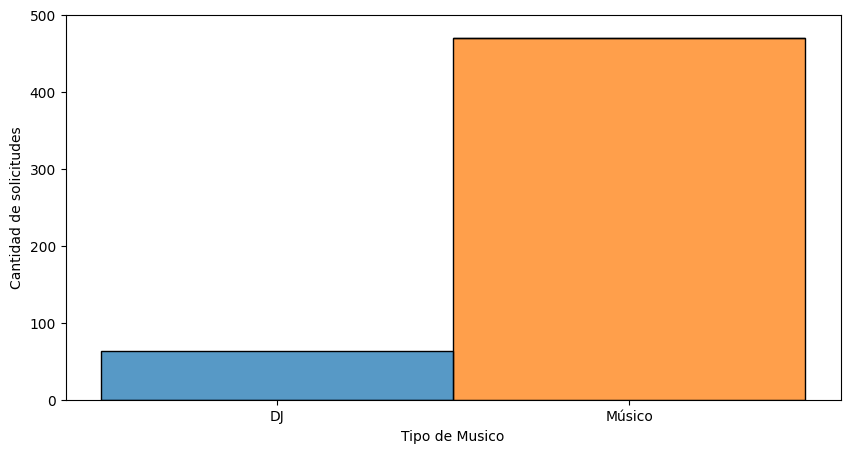

In [161]:
import matplotlib.pyplot as plot
dj = sol_musicos[sol_musicos['calculadora_musico_tipo'] == 'DJ']
mus = sol_musicos[sol_musicos['calculadora_musico_tipo'] == 'Músico']   
mus_dj = pd.merge(dj, mus, how = 'outer')


fig = plot.figure(figsize = (10,5))
sns.histplot(data = mus_dj, x = 'calculadora_musico_tipo' , 
             hue = 'calculadora_musico_tipo', 
             multiple = 'stack', legend = False
)

plt.xlabel('Tipo de Musico'),
plt.ylabel('Cantidad de solicitudes')
plt.ylim(0,500)

In [162]:
mus_dj = mus_dj[['calculadora_musico_tipo','calculadora_provincia_evento','estimacionPrecioTotal','calculadora_numero_invitados','calculadora_espacio_evento','calculadora_horas_actuacion','calculadora_formato_musico','estado_solicitud']]
mus_dj = mus_dj.iloc[3:,]
mus_dj

,calculadora_musico_tipo,calculadora_provincia_evento,estimacionPrecioTotal,calculadora_numero_invitados,calculadora_espacio_evento,calculadora_horas_actuacion,calculadora_formato_musico,estado_solicitud
3,DJ,Vizcaya,942,1.0,aire,4.0,NaN,NaN
4,DJ,Teruel,1200,100.0,dentro,16.0,NaN,NaN
5,DJ,Zaragoza,510,100.0,aire,4.0,NaN,NaN
6,DJ,Barcelona,276,100.0,dentro,1.0,NaN,NaN
7,DJ,Barcelona,456,100.0,dentro,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...
528,Músico,Zamora,1200,20.0,dentro,2.0,Banda con batería,presupuesto_calculado
529,Músico,Zamora,960,20.0,dentro,1.0,Banda con batería,presupuesto_calculado
530,Músico,Ávila,632,50.0,aire,3.0,Dúo,amedias
531,Músico,Madrid,420,100.0,dentro,2.0,Solista,presupuesto_calculado


In [163]:
baleares_musicos = sol_musicos[sol_musicos['calculadora_musico_provincia']=='Baleares']
palma_musicos = sol_musicos[sol_musicos['calculadora_musico_provincia']=='Las Palmas']
musicos_despl = baleares_musicos.merge(palma_musicos,how='outer')
musicos_despl.loc[:,['calculadora_musico_provincia','estimacionPrecioTotal']]


,calculadora_musico_provincia,estimacionPrecioTotal
0,Baleares,180 + desplazamiento
1,Baleares,180 + desplazamiento
2,Baleares,540 + desplazamiento
3,Baleares,480 + desplazamiento
4,Baleares,480 + desplazamiento
5,Baleares,480 + desplazamiento
6,Baleares,690 + desplazamiento
7,Las Palmas,300 + desplazamiento
8,Las Palmas,480 + desplazamiento


Aquí elimino strings que molestaban a la hora de calcular. Tener en cuenta que Baleares y Canarias, faltan datos de desplazamiento.

In [164]:
for i in mus_dj['estimacionPrecioTotal']:
    if len(str(i)) > len('+ desplazamiento'):
        print(i)
        mus_dj['estimacionPrecioTotal'] = mus_dj['estimacionPrecioTotal'].replace(i, i[:3])
        print(i[:3])

180 + desplazamiento
180
180 + desplazamiento
180
300 + desplazamiento
300
540 + desplazamiento
540
480 + desplazamiento
480
480 + desplazamiento
480
480 + desplazamiento
480
480 + desplazamiento
480
690 + desplazamiento
690


In [165]:

mus_dj['estimacionPrecioTotal'] =mus_dj['estimacionPrecioTotal'].dropna()
mus_dj['estimacionPrecioTotal'] = mus_dj['estimacionPrecioTotal'].astype(float)

mus_dj['estimacionPrecioTotal'].describe()


count     511.000000
mean      506.185910
std       490.839607
min        30.000000
25%       240.000000
50%       360.000000
75%       600.000000
max      6624.000000
Name: estimacionPrecioTotal, dtype: float64

In [166]:
mus_dj['estimacionPrecioTotal'].dropna().mode()


0    180.0
Name: estimacionPrecioTotal, dtype: float64

In [167]:
mus_dj['estimacionPrecioTotal'].dropna().median()

360.0

Voy a identificar los outliers min y max de Músico y DJ.

In [168]:
dj = mus_dj[mus_dj['calculadora_musico_tipo'] == 'DJ']
mus = mus_dj[mus_dj['calculadora_musico_tipo'] == 'Músico']


En cuanto a los Músicos, se puede observar que las dos primeras muestras, se calculan a partir de parámetros fuera de lo común. 90 y 50 h, además son presupuestos calculados, pero no completados, por lo que es posible que estas solicitudes fueran de prueba por parte de restaurantes, artistas curiosos, curiosos, o simplemente alguien troleando.

In [169]:
mus_max = mus.sort_values(by = 'estimacionPrecioTotal',ascending=False)
mus_max[['estimacionPrecioTotal', 'calculadora_horas_actuacion','estado_solicitud','calculadora_numero_invitados','calculadora_formato_musico','calculadora_provincia_evento']].dropna()

,estimacionPrecioTotal,calculadora_horas_actuacion,estado_solicitud,calculadora_numero_invitados,calculadora_formato_musico,calculadora_provincia_evento
452,6624.0,90.0,presupuesto_calculado,30.0,Solista,Vizcaya
234,3120.0,50.0,presupuesto_calculado,20.0,Solista,Cantabria
401,2280.0,1.0,completa,2.0,Trío,Almería
476,2280.0,2.0,amedias,20.0,Banda con batería,Madrid
216,2160.0,4.0,completa,100.0,Banda con batería,Vizcaya
...,...,...,...,...,...,...
394,120.0,1.0,completa,20.0,Dúo,Granada
313,120.0,1.0,presupuesto_calculado,20.0,Solista,Valencia
360,120.0,1.0,presupuesto_calculado,20.0,Solista,Madrid
347,84.0,1.0,completa,20.0,Solista,Madrid


In [170]:
mus_max = mus_max.iloc[2:,]
mus_max = mus_max[['estimacionPrecioTotal', 'calculadora_horas_actuacion','estado_solicitud','calculadora_numero_invitados','calculadora_formato_musico','calculadora_provincia_evento']].dropna()
mus_max

,estimacionPrecioTotal,calculadora_horas_actuacion,estado_solicitud,calculadora_numero_invitados,calculadora_formato_musico,calculadora_provincia_evento
401,2280.0,1.0,completa,2.0,Trío,Almería
476,2280.0,2.0,amedias,20.0,Banda con batería,Madrid
216,2160.0,4.0,completa,100.0,Banda con batería,Vizcaya
475,1980.0,1.0,presupuesto_calculado,40.0,Banda con batería,Madrid
370,1875.0,3.0,presupuesto_calculado,300.0,Banda con batería,Alicante
...,...,...,...,...,...,...
394,120.0,1.0,completa,20.0,Dúo,Granada
313,120.0,1.0,presupuesto_calculado,20.0,Solista,Valencia
360,120.0,1.0,presupuesto_calculado,20.0,Solista,Madrid
347,84.0,1.0,completa,20.0,Solista,Madrid


Aquí abajo, quito 1 linea que era un outlier de minimo, 30€ de precio total y presupuesto estimado, como no se completó lo elimino por los motivos de antes. Puede ser una prueba o una consulta, sin más.

In [171]:
mus_max = mus_max.sort_values(by = 'estimacionPrecioTotal')

mus_max = mus_max.iloc[1:,:].dropna()
mus_max

,estimacionPrecioTotal,calculadora_horas_actuacion,estado_solicitud,calculadora_numero_invitados,calculadora_formato_musico,calculadora_provincia_evento
347,84.0,1.0,completa,20.0,Solista,Madrid
313,120.0,1.0,presupuesto_calculado,20.0,Solista,Valencia
394,120.0,1.0,completa,20.0,Dúo,Granada
402,120.0,1.0,completa,40.0,Solista,Madrid
403,120.0,1.0,amedias,40.0,Solista,Madrid
...,...,...,...,...,...,...
370,1875.0,3.0,presupuesto_calculado,300.0,Banda con batería,Alicante
475,1980.0,1.0,presupuesto_calculado,40.0,Banda con batería,Madrid
216,2160.0,4.0,completa,100.0,Banda con batería,Vizcaya
476,2280.0,2.0,amedias,20.0,Banda con batería,Madrid


In [172]:
px.histogram(mus_max, x='estimacionPrecioTotal', 
          #  y = 'calculadora_horas_actuacion',
             color='estado_solicitud',
             title="Rangos de precio según estado de solicitud", 
             labels={'estado_solicitud': 'Estado de solicitud', 'calculadora_horas_actuacion':' ', 'estimacionPrecioTotal': 'Precio Total'}
             )

### ¿Qué formatos son los más solicitados? (solista, dúo, trío...).

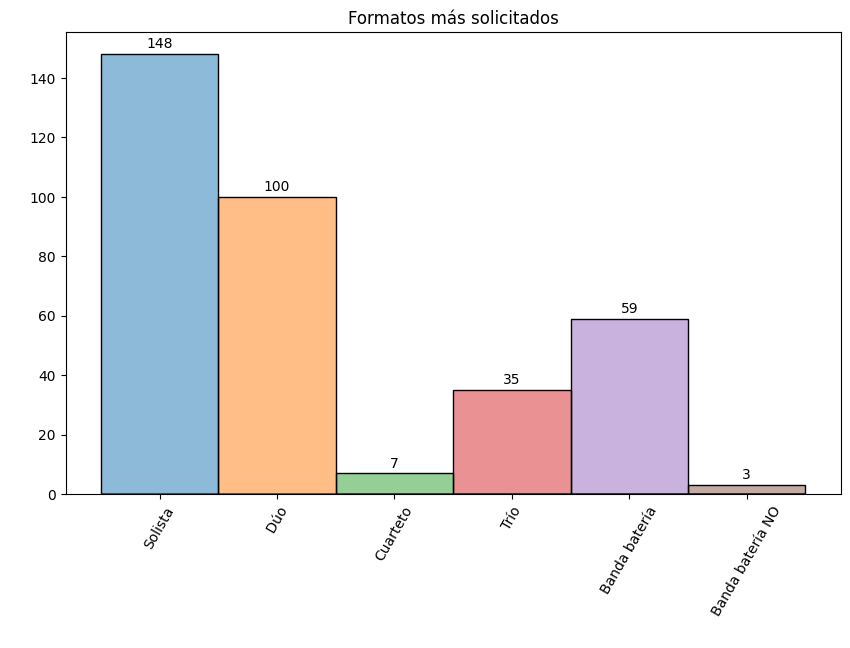

In [173]:
plt.figure(figsize=(10,6))
ax =sns.histplot(mus_max, x = 'calculadora_formato_musico',hue= 'calculadora_formato_musico',legend=False)
plt.xticks(rotation=60)
custom_labels = ['Solista',' Dúo','Cuarteto','Trío', 'Banda batería', 'Banda batería NO']

plt.xticks(range(len(custom_labels)), custom_labels)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Formatos más solicitados')
# Bucle para poner numeros encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Para borrar unos 0 que aparecían en la cepa de las barras.
        ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(height)}', ha="center")


plt.show()

### Rango de precios por tipo de formato

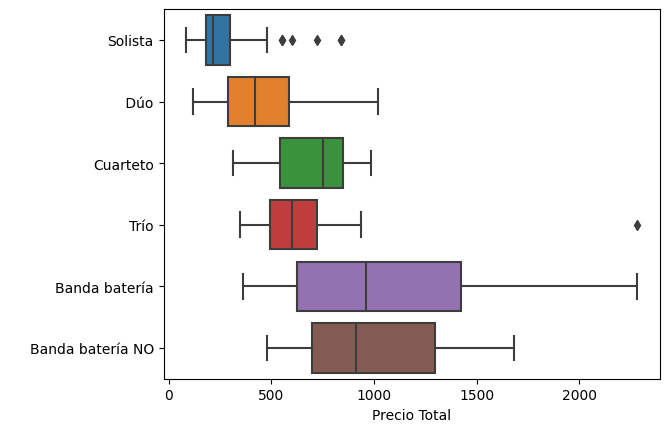

In [174]:
sns.boxplot(mus_max, x = 'estimacionPrecioTotal', y = 'calculadora_formato_musico')
plt.yticks(range(len(custom_labels)), custom_labels)
plt.xlabel('Precio Total')
plt.ylabel(' ');

In [175]:
fig = px.box(mus_max, x='estimacionPrecioTotal', y='calculadora_formato_musico',
             color='calculadora_formato_musico',
             boxmode='overlay')

fig.update_layout(
    title="Precio total por formato de banda",  
    xaxis_title="Precio total", 
    yaxis_title=" ",  
    showlegend=False 
)

# Percentiles, mediana, y media por cada formato de banda
grouped_data = mus_max.groupby('calculadora_formato_musico')['estimacionPrecioTotal']
annotations = []
for name, group in grouped_data:
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    text = f"El rango de precios solicitados de '{name}' está entre {q1} y {q3}."
    annotations.append(text)
fig.show()
print(annotations)

["El rango de precios solicitados de 'Banda con batería' está entre 624.0 y 1422.0.", "El rango de precios solicitados de 'Banda/Conjunto sin batería' está entre 696.0 y 1296.0.", "El rango de precios solicitados de 'Cuarteto' está entre 540.0 y 846.0.", "El rango de precios solicitados de 'Dúo' está entre 288.0 y 585.0.", "El rango de precios solicitados de 'Solista' está entre 180.0 y 300.0.", "El rango de precios solicitados de 'Trío' está entre 492.0 y 720.0."]


## Análisis para DJ's

In [176]:
dj_max = dj.sort_values(by = 'estimacionPrecioTotal',ascending=False)
dj_max.head(10)

,calculadora_musico_tipo,calculadora_provincia_evento,estimacionPrecioTotal,calculadora_numero_invitados,calculadora_espacio_evento,calculadora_horas_actuacion,calculadora_formato_musico,estado_solicitud
60,DJ,Valencia,3000.0,50.0,aire,3.0,NaN,presupuesto_calculado
4,DJ,Teruel,1200.0,100.0,dentro,16.0,NaN,NaN
3,DJ,Vizcaya,942.0,1.0,aire,4.0,NaN,NaN
20,DJ,Almería,720.0,150.0,aire,5.0,NaN,NaN
43,DJ,Valencia,600.0,50.0,aire,6.0,NaN,presupuesto_calculado
56,DJ,Orense,600.0,100.0,aire,4.0,NaN,amedias
55,DJ,Madrid,600.0,200.0,aire,4.0,NaN,presupuesto_calculado
11,DJ,Sevilla,540.0,100.0,aire,3.0,NaN,NaN
5,DJ,Zaragoza,510.0,100.0,aire,4.0,NaN,NaN
22,DJ,Almería,480.0,50.0,aire,3.0,NaN,presupuesto_calculado


In [177]:
dj_max.describe()

,estimacionPrecioTotal,calculadora_numero_invitados,calculadora_horas_actuacion
count,59.000000,60.000000,60.000000
mean,338.389831,48.800000,2.950000
std,412.933326,45.477057,2.150483
min,60.000000,1.000000,1.000000
25%,174.000000,20.000000,2.000000
50%,240.000000,30.000000,3.000000
75%,390.000000,52.500000,4.000000
max,3000.000000,207.000000,16.000000


In [178]:

px.histogram(dj_max, x='estimacionPrecioTotal', 
             color='estado_solicitud',
             title="Cantidad de solicitudes por estado de solicitud y precio total", 
             labels={'estado_solicitud': 'Estado solicitud','estimacionPrecioTotal': 'Precio Total'},
             nbins = 10
             )


In [179]:
dj_max = dj_max.iloc[1:,]
dj_max = dj_max[['estimacionPrecioTotal', 'calculadora_horas_actuacion','calculadora_numero_invitados','estado_solicitud','calculadora_provincia_evento','calculadora_espacio_evento']].dropna()
dj_max.iloc[:,:4].head()

,estimacionPrecioTotal,calculadora_horas_actuacion,calculadora_numero_invitados,estado_solicitud
43,600.0,6.0,50.0,presupuesto_calculado
56,600.0,4.0,100.0,amedias
55,600.0,4.0,200.0,presupuesto_calculado
22,480.0,3.0,50.0,presupuesto_calculado
25,456.0,3.0,130.0,presupuesto_calculado


In [180]:
px.histogram(dj_max, x='estimacionPrecioTotal', 
             color='estado_solicitud',
             title="Cantidad de solicitudes por estado de solicitud y precio total", 
             labels={'estado_solicitud': 'Estado solicitud','estimacionPrecioTotal': 'Precio Total'},
             nbins = 10
)

El rango de precios más solicitado de DJ está entre 120 y 300.


In [181]:

dj_comp = dj_max[dj_max['estado_solicitud'] == 'completa']
dj_comp.size

114

In [182]:
fig = px.box(dj_max, x='estimacionPrecioTotal',
             y='estado_solicitud',
             color='estado_solicitud',
             boxmode='overlay')

fig.update_layout(
    title="Precio total por estado de solicitud",  
    xaxis_title="Precio total", 
    yaxis_title=" ",  
    showlegend=False 
)

# Percentiles, mediana, y media por estado de solicitud
grouped_data = dj_max.groupby('estado_solicitud')['estimacionPrecioTotal']
annotations = []
for name, group in grouped_data:
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    text = f"El rango de precios solicitados de '{name}' está entre {q1} y {q3}."
    annotations.append(text)
fig.show()
print(annotations)

["El rango de precios solicitados de 'amedias' está entre 150.0 y 330.0.", "El rango de precios solicitados de 'completa' está entre 168.0 y 246.0.", "El rango de precios solicitados de 'presupuesto_calculado' está entre 120.0 y 300.0."]


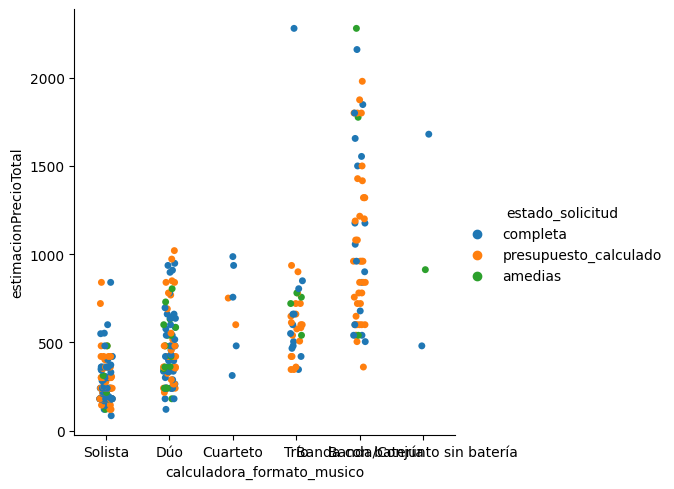

In [183]:
sns.catplot(x='calculadora_formato_musico', y= 'estimacionPrecioTotal', hue="estado_solicitud", data=mus_max);

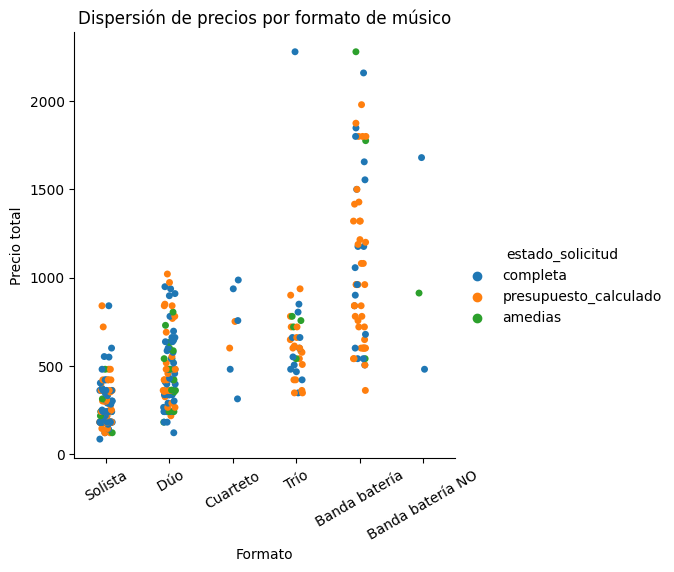

In [184]:
sns.catplot(x='calculadora_formato_musico', 
            y='estimacionPrecioTotal', 
            hue='estado_solicitud', 
            data=mus_max,
            )
plt.title('Dispersión de precios por formato de músico')
plt.xlabel('Formato')
plt.ylabel('Precio total')
plt.xticks(range(len(custom_labels)), custom_labels,rotation=30)


plt.show()



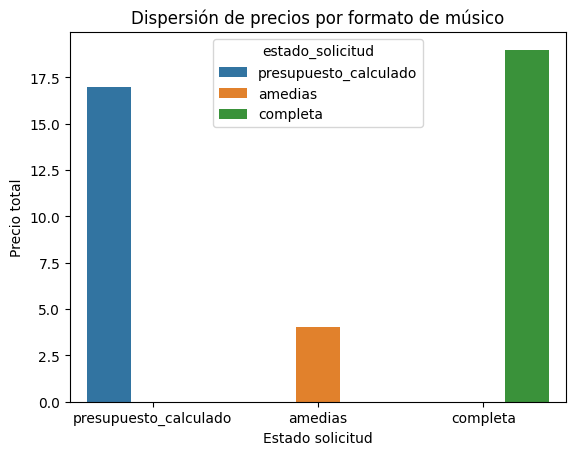

In [185]:

sns.countplot(dj_max,
            x='estado_solicitud',  
            hue='estado_solicitud', 
            
            )
plt.title('Dispersión de precios por formato de músico')
plt.xlabel('Estado solicitud')
plt.ylabel('Precio total')



plt.show()

In [186]:
mus_max.head(1)

,estimacionPrecioTotal,calculadora_horas_actuacion,estado_solicitud,calculadora_numero_invitados,calculadora_formato_musico,calculadora_provincia_evento
347,84.0,1.0,completa,20.0,Solista,Madrid


### ¿Qué músicos son los más solicitados?

In [187]:
dj = sol_musicos[sol_musicos['calculadora_musico_tipo'] == 'DJ']
mus = sol_musicos[sol_musicos['calculadora_musico_tipo'] == 'Músico']  

In [188]:
mus_count = mus.groupby('calculadora_musico_provincia',as_index=False)[['calculadora_musico_nombre_artistico']].value_counts()
mus_count

,calculadora_musico_provincia,calculadora_musico_nombre_artistico,count
0,Albacete,aitor_musico,9
1,Albacete,Julia Martínez,3
2,Albacete,Kalifornia Party band,1
3,Alicante,DOCTOR JAVA,4
4,Alicante,The Zlyppers,3
...,...,...,...
211,Zaragoza,ALEXIA PARRA,1
212,Zaragoza,La Buena Onda con Jadey,1
213,Álava,KRN,1
214,Ávila,LUNA LLENA,1


In [191]:
mus_count = mus_count[mus_count['count'] > 3]


fig = px.histogram(mus_count, 
                   x="calculadora_musico_nombre_artistico", 
                   y = 'count', 
                   color='calculadora_musico_provincia')

# fig.update_yaxes(range=[10, None])


fig.show()

In [113]:
mus_count

,calculadora_musico_provincia,calculadora_musico_nombre_artistico,count
0,Albacete,aitor_musico,9
1,Albacete,Julia Martínez,3
3,Alicante,DOCTOR JAVA,4
4,Alicante,The Zlyppers,3
5,Alicante,The Latín Experience,2
...,...,...,...
204,Vizcaya,Meteorito J,3
205,Vizcaya,Kilometro cero,2
206,Vizcaya,TUTUKÁ,2
208,Zamora,Arre-Molke,2
